In [18]:
import pandas as pd
import numpy as np
from sklearn import model_selection

test_df = pd.read_csv("30-days-of-ml/test.csv")
train_df = pd.read_csv("30-days-of-ml/train.csv")

# Prepare values for training data
# labels = train_df.pop('target').values
# data = train_df.values

print("Done")

Done


In [15]:
train_df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1,B,B,B,C,B,B,A,E,C,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,2,B,B,A,A,B,D,A,F,A,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,3,A,A,A,C,B,D,A,D,A,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,4,B,B,A,C,B,D,A,E,C,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,6,A,A,A,C,B,D,A,E,A,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [16]:
test_df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


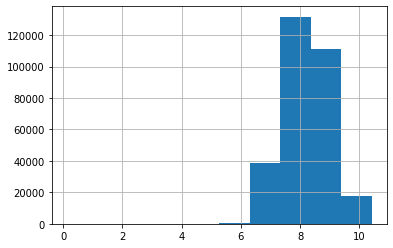

In [19]:
train_df.target.hist()

### Notes

for regression problems you can use k-fold and check that the distribution of data in each fold is the same
otherwise use suregas rule

In [24]:
train_df["kfold"] = -1

In [27]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold,(train_indicies, valid_indicies) in enumerate(kf.split(X=train_df)):
    train_df.loc[valid_indicies,"kfold"] = fold
    

In [28]:
train_df.kfold.value_counts()

4    60000
3    60000
2    60000
1    60000
0    60000
Name: kfold, dtype: int64

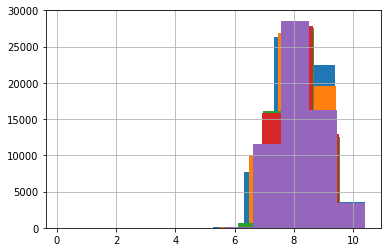

In [32]:
for num in range(5):
    train_df[train_df.kfold == num].target.hist()

In [33]:
train_df.to_csv("train_data_kfolds.csv", index=False)

In [35]:
df_train = pd.read_csv("train_data_kfolds.csv")
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,0
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,2
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,3
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,1
